In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def extract_data(dG_name, err_name, df):
    # extract ΔG(site,couple) values for each compound and each replica
    cmpnd_list = [ 'theophylline', '1_methylxanthine', '3_methylxanthine', 'hypoxanthine', 'xanthine', 'caffeine' ]
    rep_list = [ 'rep1', 'rep2', 'rep3']
    rep_list_3mthyl = [ 'rep1', 'rep2', 'rep5', 'rep3', 'rep4']

    # define a dict with compund names as keys 
    data = {key:[] for key in cmpnd_list}
    for cmp in cmpnd_list:
        if cmp == '3_methylxanthine':
            rep_ls = rep_list_3mthyl
        else:
            rep_ls = rep_list
        for rep in rep_ls:
            # check if it is the contribution of restraints for ligand only system
            # and if so add the ΔG(bulk,c) + ΔG(bulk,o+a+r)
            if dG_name == 'ΔG(bulk,c)':
                data[cmp].append(df.loc[cmp,rep][dG_name]+df.loc[cmp,rep]['ΔG(bulk,o+a+r)'])
            else:
                data[cmp].append(df.loc[cmp,rep][dG_name])

    # define a dict with compund names as keys 
    data_err = {key:[] for key in cmpnd_list}
    for cmp in cmpnd_list:
        if cmp == '3_methylxanthine':
            rep_ls = rep_list_3mthyl
        else:
            rep_ls = rep_list
        for rep in rep_ls:
            data_err[cmp].append(df.loc[cmp,rep][err_name])

    return data, data_err

In [35]:
def plot_reps(data, data_err, fig_name, color, title_txt):
    if color=='b':
        colors = plt.cm.Blues(np.linspace(0.3, 1, 3))
    else:
        colors = plt.cm.Reds(np.linspace(0.3, 1, 3))
    colors = np.vstack([colors,[0.7,0.7,0.7,1],[0.7,0.7,0.7,1]])

    fig, ax = plt.subplots()
    bar_width = 0.15
    bar_x = list(range(len(data)))
    leg_lis = ['rep1','rep2','rep3','failed rep']
    for (i, (key, values)) in enumerate(data.items()):
        for j, value in enumerate(values):
            error = data_err[key][j]
            if key == '3_methylxanthine' and j<4:
                ax.bar(bar_x[i] + j * bar_width, value, bar_width, color=colors[j % 5], yerr=error, edgecolor='black',linewidth=.3, align='center', capsize=3, label = leg_lis[j])
            else:
                ax.bar(bar_x[i] + j * bar_width, value, bar_width, color=colors[j % 5], yerr=error, edgecolor='black',linewidth=.3, align='center', capsize=3)

    # find the minimum and maximum values in the data
    data_min = min([min(value) for value in data.values()])
    data_max = max([max(value) for value in data.values()])
    # automatically set the y-axis limits
    plt.ylim(ymin=data_min - 10, ymax=data_max + 10)
    if fig_name.startswith('s1'):
        ax.set_ylabel('ΔG(site,couple) kcal/mol', fontsize=14)
        plt.ylim(-310, -170)
    elif fig_name.startswith('s2'):
        plt.ylim(-60,0)
        ax.set_ylabel('ΔG(site,restraints) kcal/mol', fontsize=14)
    elif fig_name.startswith('s3'):
        plt.ylim(160,290)
        ax.set_ylabel('ΔG(bulk,couple) kcal/mol', fontsize=14)
    elif fig_name.startswith('s4'):
        plt.ylim(11,13)
        ax.set_ylabel('ΔG(bulk,restraints) kcal/mol', fontsize=14)
        ytick_ = [11, 12, 13]
        ax.set_yticks(ytick_)
    # set xticks to be in the center of three reps
    xt = [ x + .2 for x in list(range(len(data)))]
    ax.set_xticks(xt)
    
    ax.set_title(title_txt, fontsize=15)
    cmpnd_list = [ 'Theophylline', '1-Methylxanthine', '3-Methylxanthine', 'Hypoxanthine', 'Xanthine', 'Caffeine' ]

    ax.set_xticklabels(cmpnd_list, rotation=30, ha='center', va='top', fontsize=12)
    
#     ax.legend(['rep 1', 'rep 2', 'rep 3'])
#     plt.plot([],[],color='k',label='failed rep')
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    
    plt.savefig(f"./figs/%s.pdf" % fig_name, bbox_inches='tight')

In [36]:
df = pd.read_csv("./BFE_failed_rep/55_NaCl_2Mg_TP3_GAF_40_1ns_unres.txt", sep='\t', header=0)
df.set_index(['cmpnd', 'rep'], inplace=True)

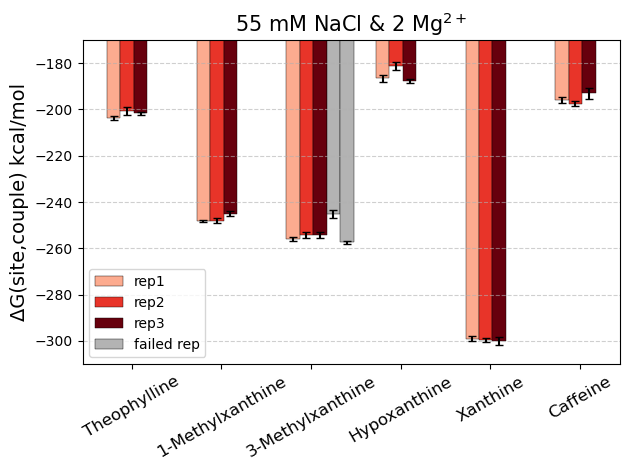

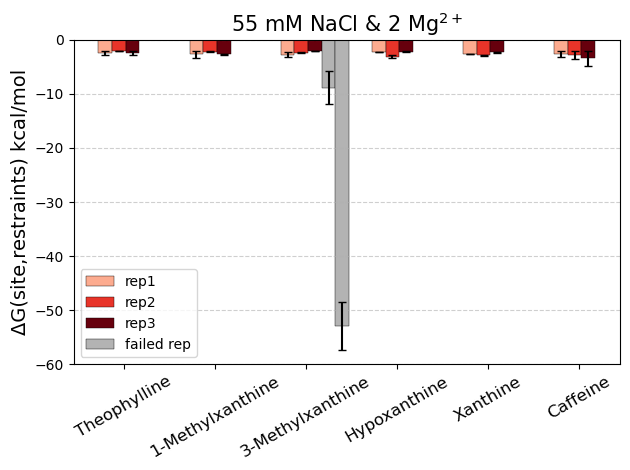

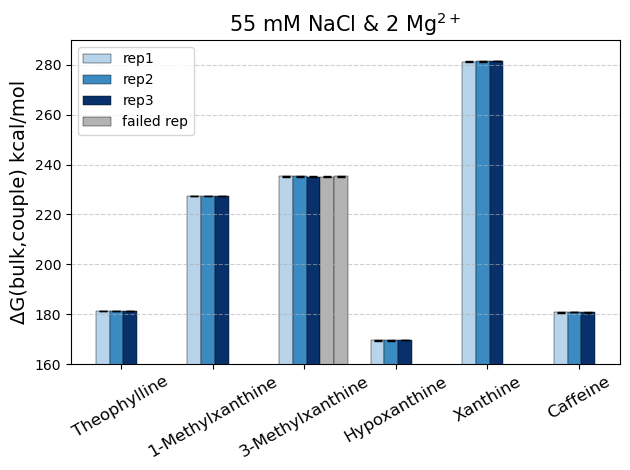

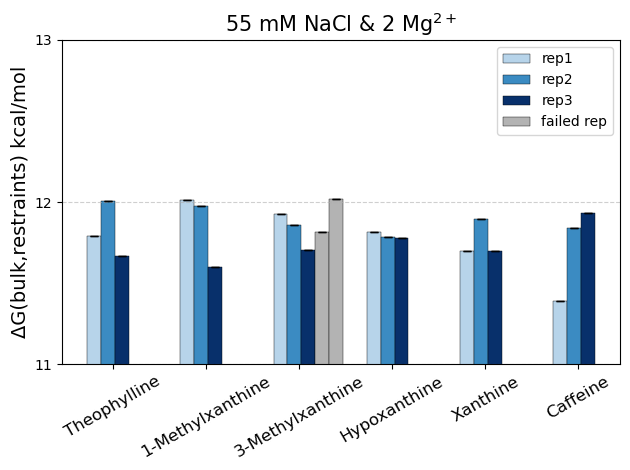

In [37]:
data, data_err = extract_data('ΔG(site,couple)', 'error(site,couple)',df)
plot_reps(data, data_err, 's1_55NaCl_2Mg_40_30', 'r', '55 mM NaCl & 2 Mg$^{2+}$')

data, data_err = extract_data('ΔG(site,c+o+a+r)', 'error(site,c+o+a+r)',df)
plot_reps(data, data_err, 's2_55NaCl_2Mg_40_30', 'r', '55 mM NaCl & 2 Mg$^{2+}$')

data, data_err = extract_data('ΔG(bulk,decouple)', 'error(bulk,decouple)',df)
plot_reps(data, data_err, 's3_55NaCl_2Mg_40_30', 'b', '55 mM NaCl & 2 Mg$^{2+}$')

data, data_err = extract_data('ΔG(bulk,c)', 'error(bulk,c)',df)
plot_reps(data, data_err, 's4_55NaCl_2Mg_40_30', 'b', '55 mM NaCl & 2 Mg$^{2+}$')


In [38]:
def extract_data_bb(dG_name, err_name, df):
    # extract ΔG(site,couple) values for each compound and each replica
    cmpnd_list = [ 'theophylline', '1_methylxanthine', '3_methylxanthine', 'hypoxanthine', 'xanthine', 'caffeine' ]
    rep_list = [ 'rep1', 'rep2', 'rep3']

    # define a dict with compund names as keys 
    data = {key:[] for key in cmpnd_list}
    for cmp in cmpnd_list:
        for rep in rep_list:
            # check if it is the contribution of restraints for ligand only system
            # and if so add the ΔG(bulk,c) + ΔG(bulk,o+a+r)
            if dG_name == 'ΔG(bulk,c)':
                data[cmp].append(df.loc[cmp,rep][dG_name]+df.loc[cmp,rep]['ΔG(bulk,o+a+r)'])
            else:
                data[cmp].append(df.loc[cmp,rep][dG_name])

    # define a dict with compund names as keys 
    data_err = {key:[] for key in cmpnd_list}
    for cmp in cmpnd_list:
        for rep in rep_list:
            data_err[cmp].append(df.loc[cmp,rep][err_name])

    return data, data_err

In [39]:
def plot_reps_bb(data, data_err, fig_name, color, title_txt):
    if color=='b':
        colors = plt.cm.Blues(np.linspace(0.3, 1, 3))
    else:
        colors = plt.cm.Reds(np.linspace(0.3, 1, 3))
    # colors = np.vstack([colors,[0.7,0.7,0.7,1],[0.7,0.7,0.7,1]])

    fig, ax = plt.subplots()
    bar_width = 0.15
    bar_x = list(range(len(data)))
    leg_lis = ['rep1','rep2','rep3']
    for (i, (key, values)) in enumerate(data.items()):
        for j, value in enumerate(values):
            error = data_err[key][j]
            if i==0:
                ax.bar(bar_x[i] + j * bar_width, value, bar_width, color=colors[j % 3], yerr=error, edgecolor='black',linewidth=.3, align='center', capsize=3, label = leg_lis[j])
            else:
                ax.bar(bar_x[i] + j * bar_width, value, bar_width, color=colors[j % 3], yerr=error, edgecolor='black',linewidth=.3, align='center', capsize=3)

    # find the minimum and maximum values in the data
    data_min = min([min(value) for value in data.values()])
    data_max = max([max(value) for value in data.values()])
    # automatically set the y-axis limits
    plt.ylim(ymin=data_min - 10, ymax=data_max + 10)
    if fig_name.startswith('s1'):
        ax.set_ylabel('ΔG(site,couple) kcal/mol', fontsize=14)
        plt.ylim(-310, -170)
    elif fig_name.startswith('s2'):
        plt.ylim(-19,0)
        ax.set_ylabel('ΔG(site,restraints) kcal/mol', fontsize=14)
    elif fig_name.startswith('s3'):
        plt.ylim(160,290)
        ax.set_ylabel('ΔG(bulk,couple) kcal/mol', fontsize=14)
    elif fig_name.startswith('s4'):
        plt.ylim(11,13)
        ax.set_ylabel('ΔG(bulk,restraints) kcal/mol', fontsize=14)
        ytick_ = [11, 12, 13]
        ax.set_yticks(ytick_)
    # set xticks to be in the center of three reps
    xt = [ x + .2 for x in list(range(len(data)))]
    ax.set_xticks(xt)
    
    ax.set_title(title_txt, fontsize=15)
    cmpnd_list = [ 'Theophylline', '1-Methylxanthine', '3-Methylxanthine', 'Hypoxanthine', 'Xanthine', 'Caffeine' ]

    ax.set_xticklabels(cmpnd_list, rotation=30, ha='center', va='top', fontsize=12)
    
#     ax.legend(['rep 1', 'rep 2', 'rep 3'])
#     plt.plot([],[],color='k',label='failed rep')
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    
    plt.savefig(f"./figs/%s.pdf" % fig_name, bbox_inches='tight')

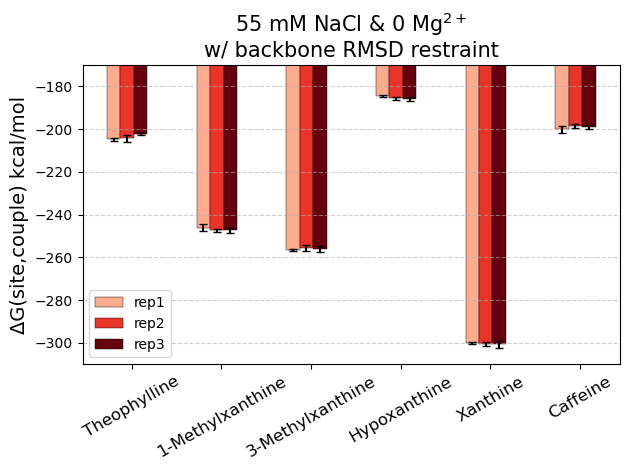

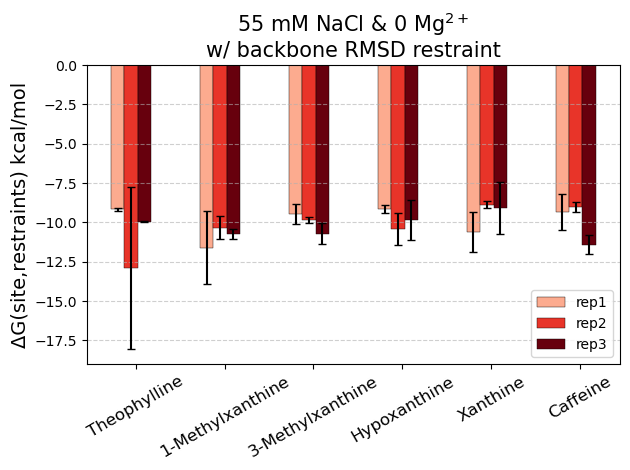

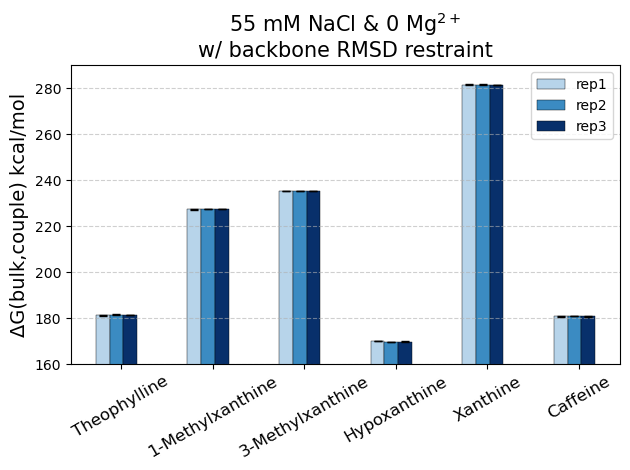

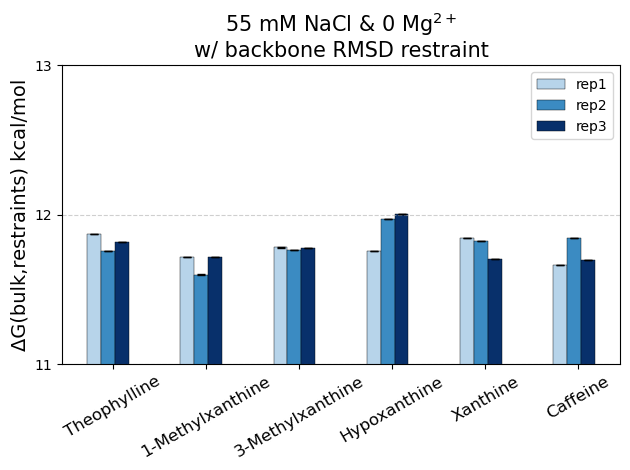

In [40]:
df = pd.read_csv("./BFE_failed_rep/55_NaCl_0Mg_TP3_GAF_40_1ns_BBres.txt", sep='\t', header=0)
df.set_index(['cmpnd', 'rep'], inplace=True)

data, data_err = extract_data_bb('ΔG(site,couple)', 'error(site,couple)',df)
plot_reps_bb(data, data_err, 's1_55NaCl_0Mg_40_30_BB', 'r', '55 mM NaCl & 0 Mg$^{2+}$\nw/ backbone RMSD restraint')

data, data_err = extract_data_bb('ΔG(site,c+o+a+r)', 'error(site,c+o+a+r)',df)
plot_reps_bb(data, data_err, 's2_55NaCl_0Mg_40_30_BB', 'r', '55 mM NaCl & 0 Mg$^{2+}$\nw/ backbone RMSD restraint')

data, data_err = extract_data_bb('ΔG(bulk,decouple)', 'error(bulk,decouple)',df)
plot_reps_bb(data, data_err, 's3_55NaCl_0Mg_40_30_BB', 'b', '55 mM NaCl & 0 Mg$^{2+}$\nw/ backbone RMSD restraint')

data, data_err = extract_data_bb('ΔG(bulk,c)', 'error(bulk,c)',df)
plot_reps_bb(data, data_err, 's4_55NaCl_0Mg_40_30_BB', 'b', '55 mM NaCl & 0 Mg$^{2+}$\nw/ backbone RMSD restraint')

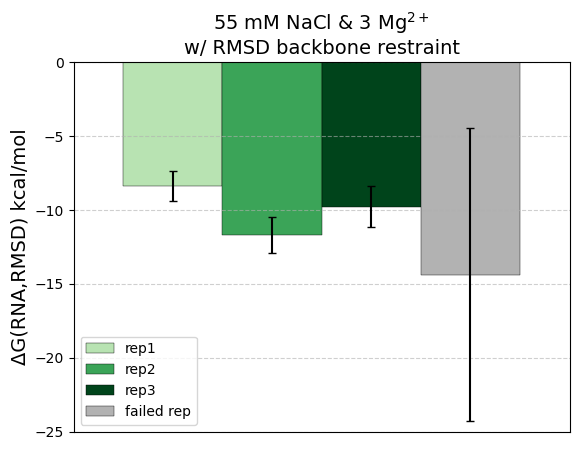

In [43]:
RMSD_3Mg = np.loadtxt("./BFE_failed_rep/rna_only_3Mg_RMSD_contribution.txt")
fig, ax = plt.subplots()
bar_width = 0.1
bar_x = list(range(len(RMSD_3Mg)))

colors = plt.cm.Greens(np.linspace(0.3, 1, 3))
rep_list = [ 'rep1', 'rep2', 'rep3']
for i in range(len(RMSD_3Mg)):
    if RMSD_3Mg[i,1]>5:
        ax.bar(bar_x[i] * bar_width, RMSD_3Mg[i,0], bar_width, color='#B2B2B2', yerr=RMSD_3Mg[i,1], edgecolor='black',linewidth=.3, align='center', capsize=3, label = 'failed rep')
    else:
        ax.bar(bar_x[i] * bar_width, RMSD_3Mg[i,0], bar_width, color=colors[i % 3], yerr=RMSD_3Mg[i,1], edgecolor='black',linewidth=.3, align='center', capsize=3, label = rep_list[i])
    
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)    
plt.xticks([]) 
plt.ylabel('ΔG(RNA,RMSD) kcal/mol', fontsize=14)
plt.title('55 mM NaCl & 3 Mg$^{2+}$\nw/ RMSD backbone restraint', fontsize=14)
plt.xlim([-.1,.4])
plt.ylim([-25,0])
plt.savefig(f"./figs/rna_RMSD_contr_3Mg.pdf", bbox_inches='tight')  


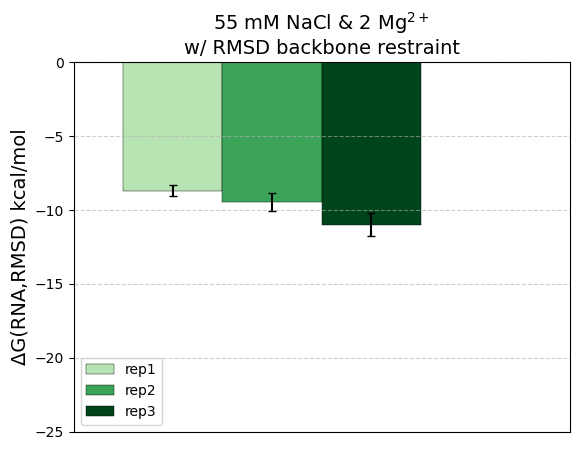

In [44]:
RMSD_3Mg = np.loadtxt("./BFE_failed_rep/rna_only_2Mg_RMSD_contribution.txt")
fig, ax = plt.subplots()
bar_width = 0.1
bar_x = list(range(len(RMSD_3Mg)))

colors = plt.cm.Greens(np.linspace(0.3, 1, 3))
rep_list = [ 'rep1', 'rep2', 'rep3']
for i in range(len(RMSD_3Mg)):
    if RMSD_3Mg[i,1]>5:
        ax.bar(bar_x[i] * bar_width, RMSD_3Mg[i,0], bar_width, color='#B2B2B2', yerr=RMSD_3Mg[i,1], edgecolor='black',linewidth=.3, align='center', capsize=3, label = 'failed rep')
    else:
        ax.bar(bar_x[i] * bar_width, RMSD_3Mg[i,0], bar_width, color=colors[i % 3], yerr=RMSD_3Mg[i,1], edgecolor='black',linewidth=.3, align='center', capsize=3, label = rep_list[i])
    
ax.legend(loc='lower left')
ax.grid(True, axis='y', linestyle='--', alpha=0.6)    
plt.xticks([]) 
plt.ylabel('ΔG(RNA,RMSD) kcal/mol', fontsize=14)
plt.title('55 mM NaCl & 2 Mg$^{2+}$\nw/ RMSD backbone restraint', fontsize=14)
plt.xlim([-.1,.4])
plt.ylim([-25,0])
plt.savefig(f"./figs/rna_RMSD_contr_2Mg.pdf" , bbox_inches='tight')  


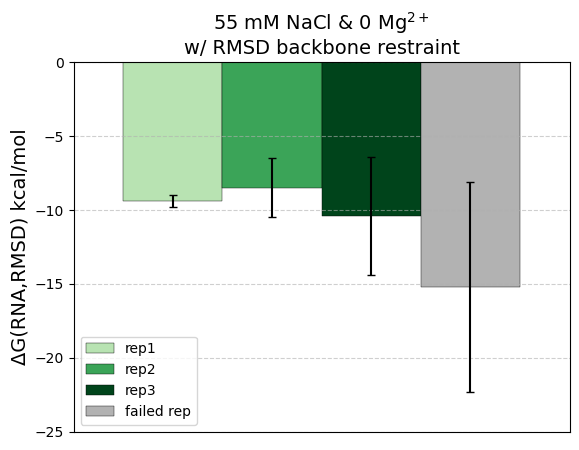

In [45]:
RMSD_3Mg = np.loadtxt("./BFE_failed_rep/rna_only_0Mg_RMSD_contribution.txt")
fig, ax = plt.subplots()
bar_width = 0.1
bar_x = list(range(len(RMSD_3Mg)))

colors = plt.cm.Greens(np.linspace(0.3, 1, 3))
rep_list = [ 'rep1', 'rep2', 'rep3']
for i in range(len(RMSD_3Mg)):
    if RMSD_3Mg[i,1]>5:
        ax.bar(bar_x[i] * bar_width, RMSD_3Mg[i,0], bar_width, color='#B2B2B2', yerr=RMSD_3Mg[i,1], edgecolor='black',linewidth=.3, align='center', capsize=3, label = 'failed rep')
    else:
        ax.bar(bar_x[i] * bar_width, RMSD_3Mg[i,0], bar_width, color=colors[i % 3], yerr=RMSD_3Mg[i,1], edgecolor='black',linewidth=.3, align='center', capsize=3, label = rep_list[i])
    
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.6)    
plt.xticks([]) 
plt.ylabel('ΔG(RNA,RMSD) kcal/mol', fontsize=14)
plt.title('55 mM NaCl & 0 Mg$^{2+}$\nw/ RMSD backbone restraint', fontsize=14)
plt.xlim([-.1,.4])
plt.ylim([-25,0])
plt.savefig(f"./figs/rna_RMSD_contr_0Mg.pdf" , bbox_inches='tight')  
